In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from plot_prop import *
from plot_projections import *
from plot_param import *
from prop_info import *
from get_segments import blade_alone, get_segments_points, get_planes
from new_projections import *
from parameters import *

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
propeller = pd.read_csv('propeller_data.csv')

In [7]:
#####################################################################################################
##########################            PRE-PROCESSING            #####################################
#####################################################################################################
propeller_coords, vect_length, vect_out, vect_side = prepare_propeller(propeller)

dmiddle, dhighest, dlowest   = d_blade(vect_length, propeller_coords)                     #d of plan ax+by+cx+d = 0
upper_blade, lower_blade     = blade_alone(propeller_coords, vect_length, dmiddle)        #points of each blades

In [26]:
nb_seg = 20

In [27]:
planes = get_planes(upper_blade, dmiddle, dhighest, vect_length, nb_seg)   #get equations of planes for projection

In [28]:
all_plane_points = get_points(upper_blade, planes)                  #get points used for each projection

Points of plane 1
Points of plane 2
Points of plane 3
Points of plane 4
Points of plane 5
Points of plane 6
Points of plane 7
Points of plane 8
Points of plane 9
Points of plane 10
Points of plane 11
Points of plane 12
Points of plane 13
Points of plane 14
Points of plane 15
Points of plane 16
Points of plane 17
Points of plane 18
Points of plane 19


In [47]:
#####################################################################################################
##########################              PROJECTION              #####################################
#####################################################################################################
right_param, left_param, right_pts, left_pts = get_all_projections(planes, all_plane_points)

Plane does not have enough points for interpolation


In [48]:
x_list = []
y_right_list = []
y_left_list = []
removed = []
for i in range(len(all_plane_points)):
    x, y_right, y_left = generate_points(right_param[i], right_pts[i], left_param[i], left_pts[i])
    if(type(x) == int):
        print("Plane {} has been removed".format(i))
        removed.append(i)
    else:
        x_list.append(x)
        y_right_list.append(y_right)
        y_left_list.append(y_left)
        
for i in removed:
    right_pts.pop(i)
    left_pts.pop(i)

Plane does not have enough points for interpolation
Plane 0 has been removed


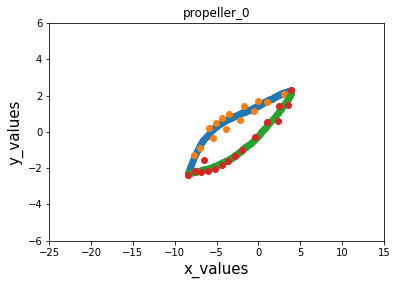

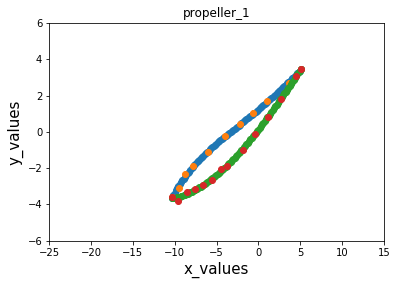

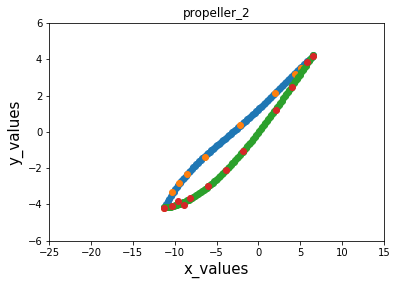

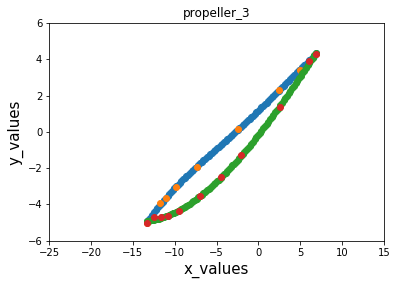

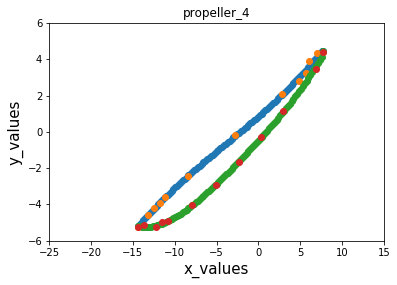

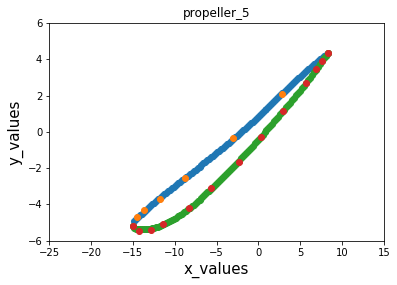

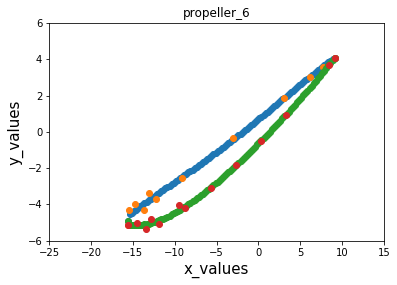

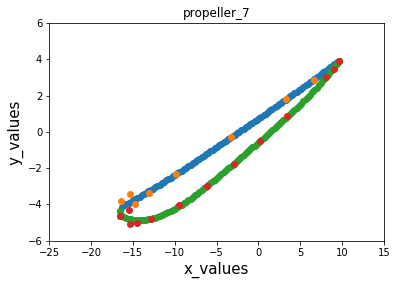

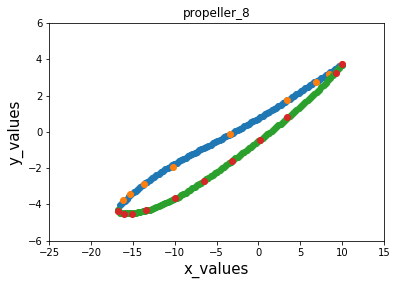

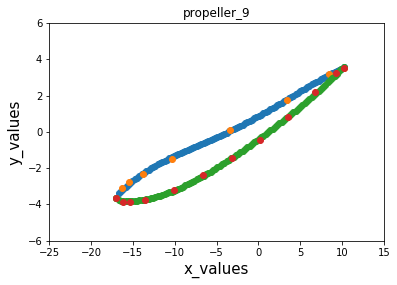

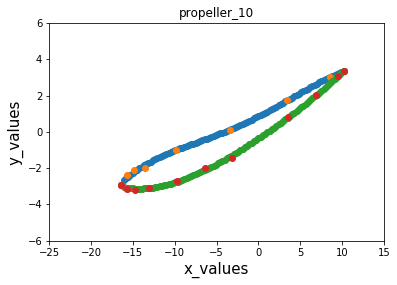

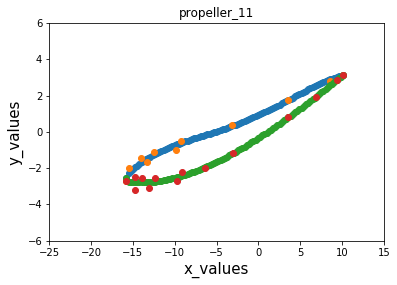

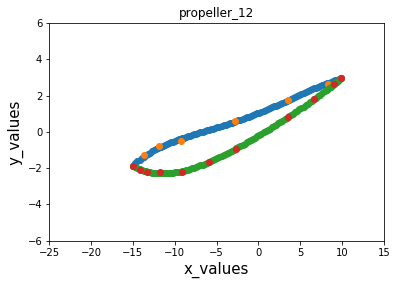

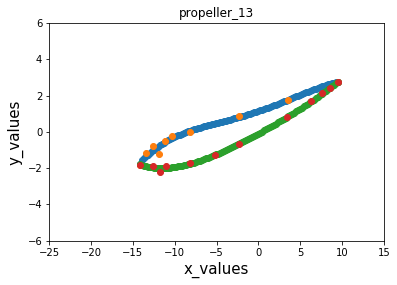

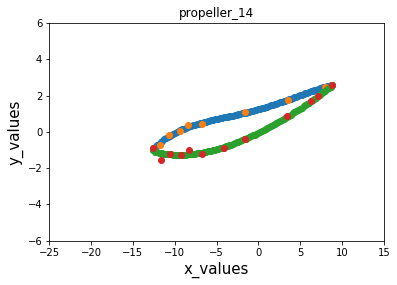

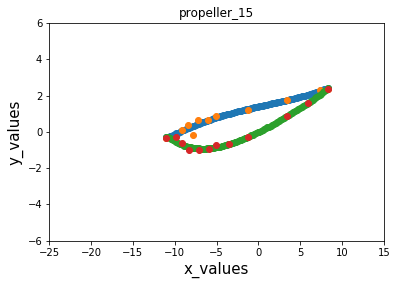

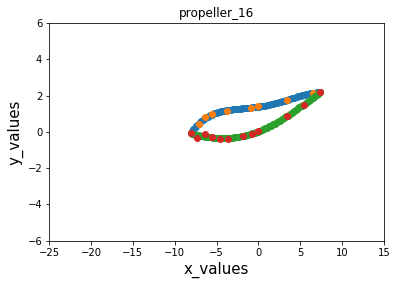

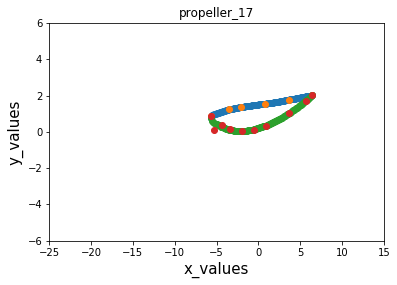

In [52]:
#for i in range(2, len(all_plane_points) -2):
for i in range(len(all_plane_points) - len(removed)):
    plot_interpolation_both_sides( right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "propeller_" + str(i))

In [ ]:
#####################################################################################################
##########################              PARAMETERS              #####################################
#####################################################################################################

### Hub

In [53]:
hub_inner_radius = get_hub_inner_radius(propeller_coords, vect_length)
hub_radius = param_hub_radius(propeller_coords, vect_length)
print(hub_radius)

8.098715634048968


### Tip radius

In [54]:
tip_radius = get_tip_radius(propeller_coords)
print(tip_radius)

126.80676910381526


### Blade twist

In [57]:
blade_twist = get_blade_twist(x_list, y_right_list, y_left_list)

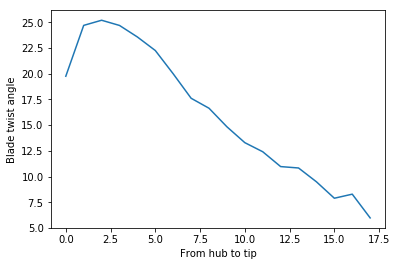

In [58]:
plt.plot(blade_twist)  #[4:len(all_plane_points) -3]
plt.ylabel('Blade twist angle')
plt.xlabel('From hub to tip')
plt.show()

### Chord length

In [59]:
chord_length = get_chord_length(x_list, y_right_list, y_left_list)
print(chord_length)

[13.1654268705657, 17.025998245626916, 19.64768433741279, 22.20442878591589, 24.187531586299972, 25.176007410153886, 26.30816282011246, 27.452226898295184, 27.900599452276385, 28.10542047636278, 27.285519790416448, 26.522390927237943, 25.332168089966817, 24.047267488490263, 21.705309832426657, 19.444480986599878, 15.64701806917749, 12.139748933708548]


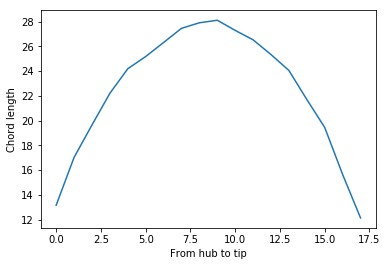

In [60]:
import matplotlib.pyplot as plt
plt.plot(chord_length)
plt.ylabel('Chord length')
plt.xlabel('From hub to tip')
plt.show()

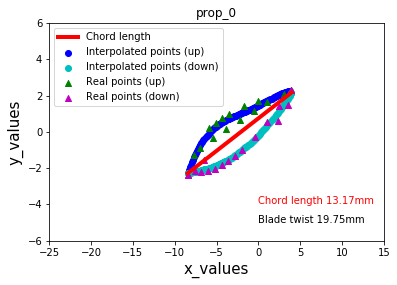

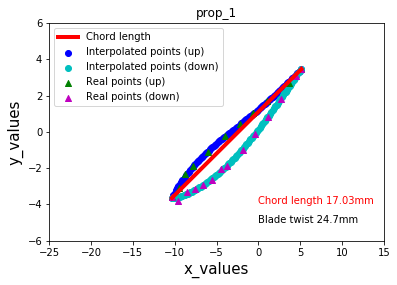

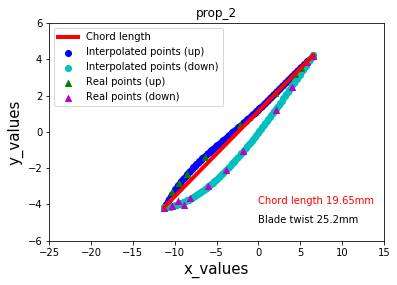

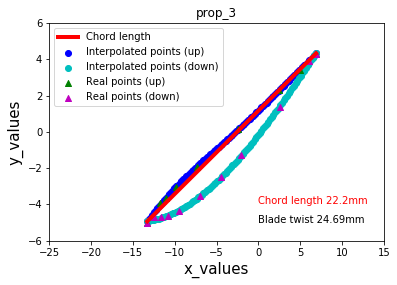

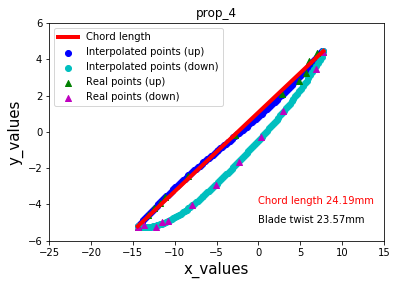

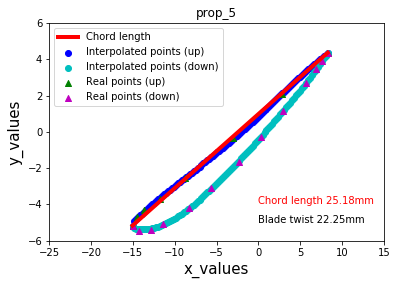

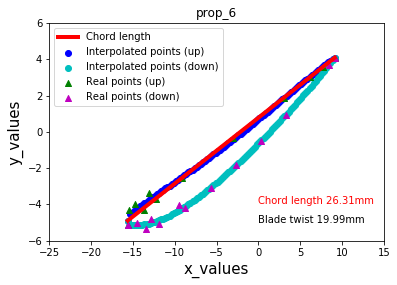

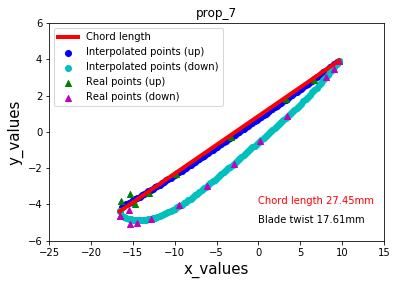

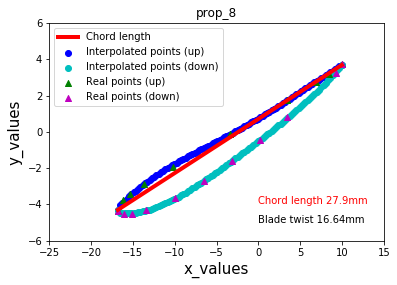

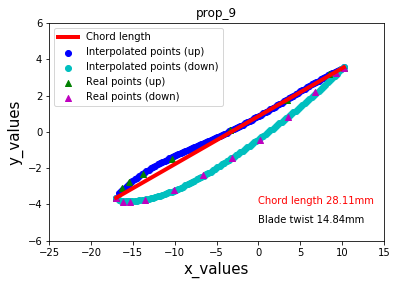

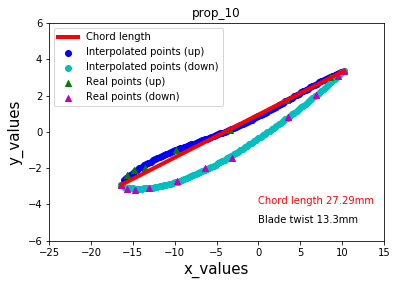

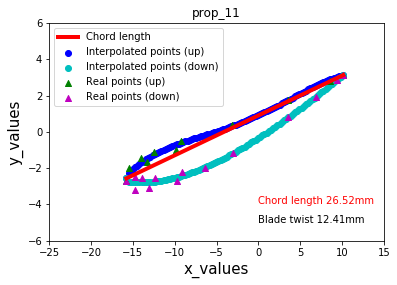

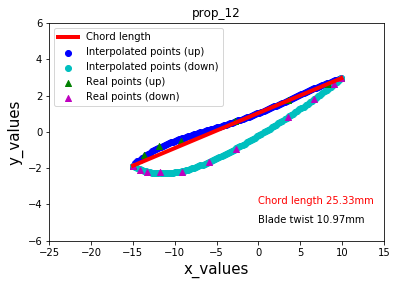

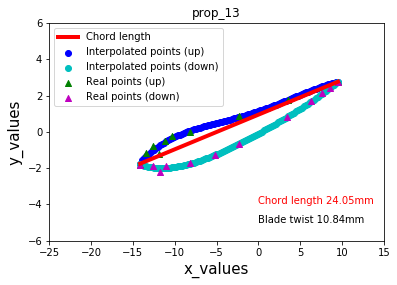

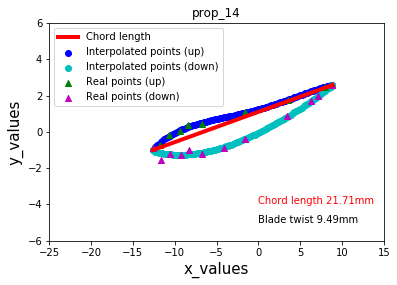

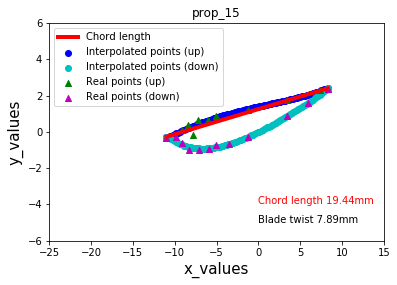

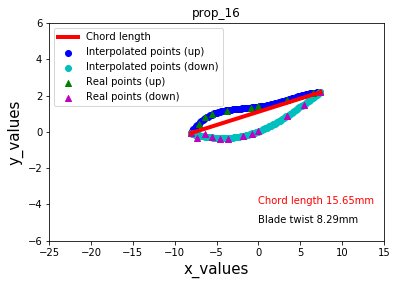

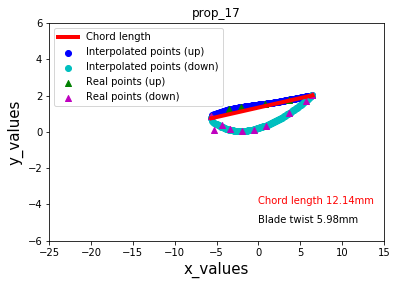

In [84]:
#for i in range(4, 8):
for i in range(len(all_plane_points) - len(removed)):
    plot_interpolation_param(right_pts[i], left_pts[i], x_list[i], y_right_list[i], y_left_list[i], i, "prop_" + str(i), chord_length, blade_twist)